**Name:** Shreya Vinay Nayak

**Github Username:** ShreyaNayak256

**USC ID:** 8592810456

In [1]:
import pandas as pd
import numpy as np
import math
import operator
import random
import statistics
from tabulate import tabulate
from beautifultable import BeautifulTable
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import hamming_loss, silhouette_score, accuracy_score
from matplotlib import rcParams
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,f1_score,log_loss,roc_curve,recall_score,precision_recall_curve,precision_score, classification_report,roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier,plot_tree
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore',category=ConvergenceWarning)
import statsmodels.api as sm
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from statistics import mean,stdev

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

## (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
df= pd.read_csv('../data/Frogs_MFCCs.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [4]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [5]:
df['RecordID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [6]:
X = df.iloc[:, :22]
print(X)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

In [7]:
y = df.iloc[:, 22:-1]
print(y)

               Family      Genus         Species
0     Leptodactylidae  Adenomera  AdenomeraAndre
1     Leptodactylidae  Adenomera  AdenomeraAndre
2     Leptodactylidae  Adenomera  AdenomeraAndre
3     Leptodactylidae  Adenomera  AdenomeraAndre
4     Leptodactylidae  Adenomera  AdenomeraAndre
...               ...        ...             ...
7190          Hylidae     Scinax     ScinaxRuber
7191          Hylidae     Scinax     ScinaxRuber
7192          Hylidae     Scinax     ScinaxRuber
7193          Hylidae     Scinax     ScinaxRuber
7194          Hylidae     Scinax     ScinaxRuber

[7195 rows x 3 columns]


In [8]:
X = df.iloc[:, :22]
y = df.iloc[:, 22:-1]
y_fam = df['Family']
y_gen = df['Genus']
y_spe = df['Species']


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=24)

In [10]:
print(df.shape)
print(y_train.shape)

(7195, 26)
(5036, 3)


## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

## i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

**Exact match score:** 

This function calculates subset accuracy meaning the predicted set of labels should exactly match with the true set of labels.

The exact match ratio is a strict metric of the model performance for multi-label problem types. The exact match ratio value is 1 when the model is perfect, and 0 when the model is very bad.


**Hamming loss:** is the fraction of wrong labels to the total number of labels. In multi-class classification, hamming loss is calculated as the hamming distance between y_true and y_pred . In multi-label classification, hamming loss penalizes only the individual labels.

## ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

## SVM Classifier without standarized features

In [11]:
def GKSVM(X_train, y_train):
    parameters = {"C": np.logspace(-3, 6, 5), "gamma": np.linspace(0.1, 2, 5)}
    SVM = SVC(kernel="rbf",decision_function_shape='ovr')
    # grid search
    gscv= GridSearchCV(estimator=SVM, param_grid=parameters, cv=10)
    gscv.fit(X_train, y_train)
    best_estimator= gscv.best_estimator_
    return gscv.best_params_, gscv.best_score_, best_estimator

In [12]:
#Using the family label
family_params, family_score, family_model = GKSVM(X_train, y_train['Family'])
print("Best parameter values:",family_params)
print("CV Score with best parameter values:",family_score)

Best parameter values: {'C': 31.622776601683793, 'gamma': 2.0}
CV Score with best parameter values: 0.994241692700937


In [13]:
#Using the Genus label
genus_params, genus_score, genus_model = GKSVM(X_train, y_train['Genus'])
print("Best parameter values:",genus_params)
print("CV Score with best parameter values:",genus_score)

Best parameter values: {'C': 31.622776601683793, 'gamma': 2.0}
CV Score with best parameter values: 0.9922555934235854


In [14]:
#Using the Species label
species_params, species_score, species_model = GKSVM(X_train, y_train['Species'])
print("Best parameter values:",species_params)
print("CV Score with best parameter values:",species_score)

Best parameter values: {'C': 31.622776601683793, 'gamma': 2.0}
CV Score with best parameter values: 0.9916595664110573


#### Using the best parameters to train and test

In [15]:
#All the labels prediction with the best parameters
family_pred = family_model.predict(X_test)
genus_pred = genus_model.predict(X_test)
species_pred = species_model.predict(X_test)

In [16]:
def hloss(y_test,y_pred):
    hl=hamming_loss(y_test, y_pred)
    return hl
def hscore(y_test,y_pred):
    hs = 1-hamming_loss(y_test,y_pred)
    return hs

In [17]:
#For the family label
family_hloss_gk=np.round(hloss(y_test['Family'],family_pred),3)
family_hscore_gk=np.round(hscore(y_test['Family'],family_pred),3)
#For the Genus label
genus_hloss_gk=np.round(hloss(y_test['Genus'],genus_pred),3)
genus_hscore_gk=np.round(hscore(y_test['Genus'],genus_pred),3)
#For the Species label
species_hloss_gk=np.round(hloss(y_test['Species'],species_pred),3)
species_hscore_gk=np.round(hscore(y_test['Species'],species_pred),3)

print("Hamming loss for family label using Gaussian kernel:",family_hloss_gk)
print("Hamming score for family label using Gaussian kernel:",family_hscore_gk)

print('Hamming loss for Genus label using Gaussian kernel:', genus_hloss_gk)
print('Hamming score for Genus label using Gaussian kernel:', genus_hscore_gk)

print('Hamming loss for Species label using Gaussian kernel:',species_hloss_gk)
print('Hamming score for Species label using Gaussian kernel:',species_hscore_gk)

Hamming loss for family label using Gaussian kernel: 0.008
Hamming score for family label using Gaussian kernel: 0.992
Hamming loss for Genus label using Gaussian kernel: 0.01
Hamming score for Genus label using Gaussian kernel: 0.99
Hamming loss for Species label using Gaussian kernel: 0.012
Hamming score for Species label using Gaussian kernel: 0.988


In [18]:
def exact_match(y_test,y_pred):
    em=accuracy_score(y_test,y_pred)
    return em
    

In [19]:
#For the family label
family_em=np.round(exact_match(y_test['Family'],family_pred),3)
print('Exact match for family label using Gaussian kernel:',family_em)
#For the Genus label
genus_em=np.round(exact_match(y_test['Genus'],genus_pred),3)
print('Exact match for genus label using Gaussian kernel:',genus_em)
#For the Species label
species_em=np.round(exact_match(y_test['Species'],species_pred),3)
print('Exact match for species label using Gaussian kernel:', species_em)

Exact match for family label using Gaussian kernel: 0.992
Exact match for genus label using Gaussian kernel: 0.99
Exact match for species label using Gaussian kernel: 0.988


In [20]:
hl_avg_gk=(family_hloss_gk+genus_hloss_gk+species_hloss_gk)/3
hl_avg_gk=round(hl_avg_gk,4)
hs_avg_gk=np.round((family_hscore_gk+genus_hscore_gk+species_hscore_gk)/3,4)
cnt = 0
for i in range(0, len(y_test)):
    if (y_test['Family'].ravel()[i]==family_pred[i] and 
        y_test['Genus'].ravel()[i]==genus_pred[i] and 
        y_test['Species'].ravel()[i]==species_pred[i]):
        cnt += 1
        
exact_match_score_avg = float(cnt)/len(y_test)
e_m_l_avg_gk = round(1-exact_match_score_avg, 3)

        
print('Average Exact Match Loss:',e_m_l_avg_gk )
print('Average Hamming Loss:', hl_avg_gk)
print('Average Hamming Score: ',hs_avg_gk)

Average Exact Match Loss: 0.013
Average Hamming Loss: 0.01
Average Hamming Score:  0.99


## iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [21]:
ss =StandardScaler()

In [22]:
def SVM_L1(X_train,y_train):
    parameters = {"C": np.logspace(-3, 6, 5)}
    SVM=LinearSVC(penalty='l1',dual=False,max_iter = 1000000)
    # grid search
    PipeLine = imbpipeline(steps=[['scaler',ss],
                             ['classifier',SVM]])
    parameters = {"classifier__C": np.logspace(-3, 6, 5)}
    gscv= GridSearchCV(estimator=PipeLine, param_grid=parameters, cv=10)
    gscv.fit(X_train, y_train)
    best_estimator= gscv.best_estimator_
    return gscv.best_params_, gscv.best_score_, best_estimator
    
    

In [23]:
#Using the family label
family_params, family_score, family_model = SVM_L1(X_train, y_train['Family'])
print("Best parameter values:",family_params)
print("CV Score with best parameter values:",family_score)

Best parameter values: {'classifier__C': 0.1778279410038923}
CV Score with best parameter values: 0.9301023225725015


In [24]:
#Using the Genus label
genus_params, genus_score, genus_model = SVM_L1(X_train, y_train['Genus'])
print("Best parameter values:",genus_params)
print("CV Score with best parameter values:",genus_score)

Best parameter values: {'classifier__C': 31.622776601683793}
CV Score with best parameter values: 0.9523411120578119


In [25]:
#Using the Species label
species_params, species_score, species_model = SVM_L1(X_train, y_train['Species'])
print("Best parameter values:",species_params)
print("CV Score with best parameter values:",species_score)

Best parameter values: {'classifier__C': 31.622776601683793}
CV Score with best parameter values: 0.9579014011171069


In [26]:
#All the labels prediction with the best parameters
family_pred = family_model.predict(X_test)
genus_pred = genus_model.predict(X_test)
species_pred = species_model.predict(X_test)

In [27]:
#For the family label
family_hloss_l1=np.round(hloss(y_test['Family'],family_pred),3)
family_hscore_l1=np.round(hscore(y_test['Family'],family_pred),3)
#For the Genus label
genus_hloss_l1=np.round(hloss(y_test['Genus'],genus_pred),3)
genus_hscore_l1=np.round(hscore(y_test['Genus'],genus_pred),3)
#For the Species label
species_hloss_l1=np.round(hloss(y_test['Species'],species_pred),3)
species_hscore_l1=np.round(hscore(y_test['Species'],species_pred),3)

print("Hamming loss for family label using SVM:",family_hloss_l1)
print("Hamming score for family label using SVM:",family_hscore_l1)

print('Hamming loss for Genus label using SVM:', genus_hloss_l1)
print('Hamming score for Genus label using SVM:', genus_hscore_l1)

print('Hamming loss for Species label using SVM:',species_hloss_l1)
print('Hamming score for Species label using SVM:',species_hscore_l1)

Hamming loss for family label using SVM: 0.058
Hamming score for family label using SVM: 0.942
Hamming loss for Genus label using SVM: 0.045
Hamming score for Genus label using SVM: 0.955
Hamming loss for Species label using SVM: 0.037
Hamming score for Species label using SVM: 0.963


In [28]:
hl_avg_l1=(family_hloss_l1+genus_hloss_l1+species_hloss_l1)/3
hl_avg_l1=round(hl_avg_l1,4)
hs_avg_l1=np.round((family_hscore_l1+genus_hscore_l1+species_hscore_l1)/3,4)
cnt = 0
for i in range(0, len(y_test)):
    if (y_test['Family'].ravel()[i]==family_pred[i] and 
        y_test['Genus'].ravel()[i]==genus_pred[i] and 
        y_test['Species'].ravel()[i]==species_pred[i]):
        cnt += 1
        
exact_match_score_avg = float(cnt)/len(y_test)
e_m_l_avg_l1 = round(1-exact_match_score_avg, 3)

        
print('Average Exact Match Loss:',e_m_l_avg_l1 )
print('Average Hamming Loss:', hl_avg_l1)
print('Average Hamming Score: ',hs_avg_l1)

Average Exact Match Loss: 0.078
Average Hamming Loss: 0.0467
Average Hamming Score:  0.9533


## iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [29]:
def smote_SVM_L1(X_train,y_train):
    smote = SMOTE(random_state=24)
    SVM=LinearSVC(penalty='l1',dual=False,max_iter=1000000)
    PipeLine = imbpipeline(steps=[['scaler',ss],
                                ['smote',smote],
                             ['classifier',SVM]])
    parameters = {"classifier__C": np.logspace(-3, 6, 5)}
    gscv= GridSearchCV(estimator=PipeLine, param_grid=parameters, cv=10)
    gscv.fit(X_train, y_train)
    best_estimator= gscv.best_estimator_
    return gscv.best_params_, gscv.best_score_, best_estimator
    

In [30]:
family_params_smote, family_score_smote, family_model_smote = smote_SVM_L1(X_train, y_train['Family'])
print("Best parameter values:",family_params_smote)
print("CV Score with best parameter values:",family_score_smote)

Best parameter values: {'classifier__C': 31.622776601683793}
CV Score with best parameter values: 0.9209638991448138


In [31]:
genus_params_smote, genus_score_smote, genus_model_smote = smote_SVM_L1(X_train, y_train['Genus'])
print("Best parameter values:",genus_params_smote)
print("CV Score with best parameter values:",genus_score_smote)

Best parameter values: {'classifier__C': 5623.413251903491}
CV Score with best parameter values: 0.9185821578465715


In [32]:
species_params_smote, species_score_smote, species_model_smote = smote_SVM_L1(X_train, y_train['Species'])
print("Best parameter values:",species_params_smote)
print("CV Score with best parameter values:",species_score_smote)

Best parameter values: {'classifier__C': 31.622776601683793}
CV Score with best parameter values: 0.9529351667771151


In [33]:
#All the labels prediction with the best parameters
family_pred = family_model_smote.predict(X_test)
genus_pred = genus_model_smote.predict(X_test)
species_pred = species_model_smote.predict(X_test)

In [34]:
#For the family label
family_hloss_smote=np.round(hloss(y_test['Family'],family_pred),3)
family_hscore_smote=np.round(hscore(y_test['Family'],family_pred),3)
#For the Genus label
genus_hloss_smote=np.round(hloss(y_test['Genus'],genus_pred),3)
genus_hscore_smote=np.round(hscore(y_test['Genus'],genus_pred),3)
#For the Species label
species_hloss_smote=np.round(hloss(y_test['Species'],species_pred),3)
species_hscore_smote=np.round(hscore(y_test['Species'],species_pred),3)

print("Hamming loss for family label using SVM:",family_hloss_smote)
print("Hamming score for family label using SVM:",family_hscore_smote)

print('Hamming loss for Genus label using SVM:', genus_hloss_smote)
print('Hamming score for Genus label using SVM:', genus_hscore_smote)

print('Hamming loss for Species label using SVM:',species_hloss_smote)
print('Hamming score for Species label using SVM:',species_hscore_smote)

Hamming loss for family label using SVM: 0.07
Hamming score for family label using SVM: 0.93
Hamming loss for Genus label using SVM: 0.08
Hamming score for Genus label using SVM: 0.92
Hamming loss for Species label using SVM: 0.046
Hamming score for Species label using SVM: 0.954


In [35]:
hl_avg_smote=(family_hloss_smote+genus_hloss_smote+species_hloss_smote)/3
hl_avg_smote=round(hl_avg_smote,4)
hs_avg_smote=np.round((family_hscore_smote+genus_hscore_smote+species_hscore_smote)/3,4)
cnt = 0
for i in range(0, len(y_test)):
    if (y_test['Family'].ravel()[i]==family_pred[i] and 
        y_test['Genus'].ravel()[i]==genus_pred[i] and 
        y_test['Species'].ravel()[i]==species_pred[i]):
        cnt += 1
        
exact_match_score_avg = float(cnt)/len(y_test)
e_m_l_avg_smote = round(1-exact_match_score_avg, 3)

        
print('Average Exact Match Loss:',e_m_l_avg_smote )
print('Average Hamming Loss:', hl_avg_smote)
print('Average Hamming Score: ',hs_avg_smote)

Average Exact Match Loss: 0.124
Average Hamming Loss: 0.0653
Average Hamming Score:  0.9347



### Conclusion about the classifiers trained:
**Observing the values in the table, it can be observed that the Gaussian Kernel SVM has least hamming loss, exact match loss and highest hamming score. It is therefore the best model out of the 3.**

**In performance the Gaussian SVM is followed by L1 penalized SVM and the last in order is L1 penalized SVM with SMOTE.**

In [36]:
data = [
    ['Gaussian Kernel SVM',hl_avg_gk,hs_avg_gk,e_m_l_avg_gk],
    ['L1 Penalized SVM',hl_avg_l1,hs_avg_l1,e_m_l_avg_l1],
    ['L1 Penalized SVM with Smote',hl_avg_smote,hs_avg_smote,e_m_l_avg_smote],
 
]
col_names = ['Model','Avg Hamming Loss','Avg Hamming Score',' Avg Exact Match Loss']
print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))

+----+-----------------------------+--------------------+---------------------+-------------------------+
|    | Model                       |   Avg Hamming Loss |   Avg Hamming Score |    Avg Exact Match Loss |
+====+=============================+====================+=====================+=========================+
|  0 | Gaussian Kernel SVM         |             0.01   |              0.99   |                   0.013 |
+----+-----------------------------+--------------------+---------------------+-------------------------+
|  1 | L1 Penalized SVM            |             0.0467 |              0.9533 |                   0.078 |
+----+-----------------------------+--------------------+---------------------+-------------------------+
|  2 | L1 Penalized SVM with Smote |             0.0653 |              0.9347 |                   0.124 |
+----+-----------------------------+--------------------+---------------------+-------------------------+


## v. Extra Practice: Study the Classifier Chain method and apply it to the above problem.

## vi. Extra Practice: Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained in above.

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

## Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

## a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.


In [37]:
#Dropping the unnecessary column from the entire dataset
df=df.drop('RecordID',axis=1)

In [38]:
df.head(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


In [39]:
def get_optimal_cluster(X):
    scores={}
    for k in range(2,51):
        model=KMeans(n_clusters=k,)
        model.fit(X)
        si_score=silhouette_score(X,model.labels_)
        scores[k]=si_score
    #Sorting the scores
    scores_ordered= sorted(scores.items(),key=operator.itemgetter(1),reverse=True)
    best_score=scores_ordered[0][0]
    return best_score

In [40]:
best_cluster={}
for i in range(1,51):
    best_cluster[i]=get_optimal_cluster(X) 
    print("_"*60)
    print("For iteration ",i,"optimal number of clusters: ",best_cluster[i])  

____________________________________________________________
For iteration  1 optimal number of clusters:  4
____________________________________________________________
For iteration  2 optimal number of clusters:  4
____________________________________________________________
For iteration  3 optimal number of clusters:  4
____________________________________________________________
For iteration  4 optimal number of clusters:  4
____________________________________________________________
For iteration  5 optimal number of clusters:  4
____________________________________________________________
For iteration  6 optimal number of clusters:  4
____________________________________________________________
For iteration  7 optimal number of clusters:  4
____________________________________________________________
For iteration  8 optimal number of clusters:  4
____________________________________________________________
For iteration  9 optimal number of clusters:  4
___________________

## (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species. Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

In [45]:
ham_loss=[]
ham_score=[]
ham_dist=[]
fam_maj_trip={p:[] for p in range(1,51)}
genus_maj_trip={p:[] for p in range(1,51)}
species_maj_trip={p:[] for p in range(1,51)}

for i in range(1,51):
    silh_avg = dict()
    model = KMeans(n_clusters=4, random_state=random.randint(1,100))
    model.fit(X)
    clusters = list(model.labels_)
    df_clustered = pd.concat([X,y],axis=1)
    df_clustered['labels'] = clusters
    
    cluster0 = df_clustered[df_clustered['labels']==0]
    cluster1 = df_clustered[df_clustered['labels']==1]
    cluster2 = df_clustered[df_clustered['labels']==2]
    cluster3 = df_clustered[df_clustered['labels']==3]
    
    cluster_list = [cluster0,cluster1,cluster2,cluster3]
    print("*"*50)
    print("Iteration: ",i)
    print("*"*50)
    for j in range(df_clustered['labels'].max()):
        cluster = cluster_list[j]
        print("For cluster: ",j)
        print("Majority Label in Family: ",cluster['Family'].mode()[0])
        print("Majority Label in Genus: ",cluster['Genus'].mode()[0])
        print("Majority Label in Species ",cluster['Species'].mode()[0])
        print("_"*50)
    
    predictions = {}
    for j in range(4):
        predictions[j]={
            "family":cluster_list[j]['Family'].mode()[0],
            "genus":cluster_list[j]['Genus'].mode()[0],
            "species":cluster_list[j]['Species'].mode()[0],
        }
    fam_pred = []
    gen_pred = []
    spe_pred = []
    for i in range(len(df_clustered)):
        fam_pred.append(predictions[df_clustered['labels'][i]]['family'])
        gen_pred.append(predictions[df_clustered['labels'][i]]['genus'])
        spe_pred.append(predictions[df_clustered['labels'][i]]['species'])

    fam_hloss = hloss(df_clustered['Family'],fam_pred)
    gen_hloss = hloss(df_clustered['Genus'],gen_pred)
    spe_hloss = hloss(df_clustered['Species'],spe_pred)
    
    ham_loss.append((fam_hloss+gen_hloss+spe_hloss)/3)
    ham_score.append(1-(fam_hloss+gen_hloss+spe_hloss)/3)
    ham_dist.append((fam_hloss+gen_hloss+spe_hloss)*len(X))

**************************************************
Iteration:  1
**************************************************
For cluster:  0
Majority Label in Family:  Dendrobatidae
Majority Label in Genus:  Ameerega
Majority Label in Species  Ameeregatrivittata
__________________________________________________
For cluster:  1
Majority Label in Family:  Leptodactylidae
Majority Label in Genus:  Adenomera
Majority Label in Species  AdenomeraHylaedactylus
__________________________________________________
For cluster:  2
Majority Label in Family:  Hylidae
Majority Label in Genus:  Hypsiboas
Majority Label in Species  HypsiboasCordobae
__________________________________________________
**************************************************
Iteration:  2
**************************************************
For cluster:  0
Majority Label in Family:  Leptodactylidae
Majority Label in Genus:  Adenomera
Majority Label in Species  AdenomeraHylaedactylus
__________________________________________________
For 

In [46]:
print("Mean Hamming Loss: ",mean(ham_loss))
print("Mean Hamming Score: ",mean(ham_score))
print("Mean Hamming Distance: ",mean(ham_dist))

Mean Hamming Loss:  0.22360991429233262
Mean Hamming Score:  0.7763900857076674
Mean Hamming Distance:  4826.62


In [47]:
data = [
    ['KMeans',"Average",mean(ham_loss),mean(ham_score),mean(ham_dist)],
    ['KMeans',"Standard Deviation",stdev(ham_loss),stdev(ham_score),stdev(ham_dist)]
 
]
col_names = ['Model','Metric','Hamming Loss','Hamming Score','Hamming Distance']
print(tabulate(data, headers=col_names, tablefmt="grid", showindex="always"))

+----+---------+--------------------+----------------+-----------------+--------------------+
|    | Model   | Metric             |   Hamming Loss |   Hamming Score |   Hamming Distance |
+====+=========+====================+================+=================+====================+
|  0 | KMeans  | Average            |     0.22361    |      0.77639    |           4826.62  |
+----+---------+--------------------+----------------+-----------------+--------------------+
|  1 | KMeans  | Standard Deviation |     0.00510199 |      0.00510199 |            110.126 |
+----+---------+--------------------+----------------+-----------------+--------------------+


# 3. ISLR 12.6.2

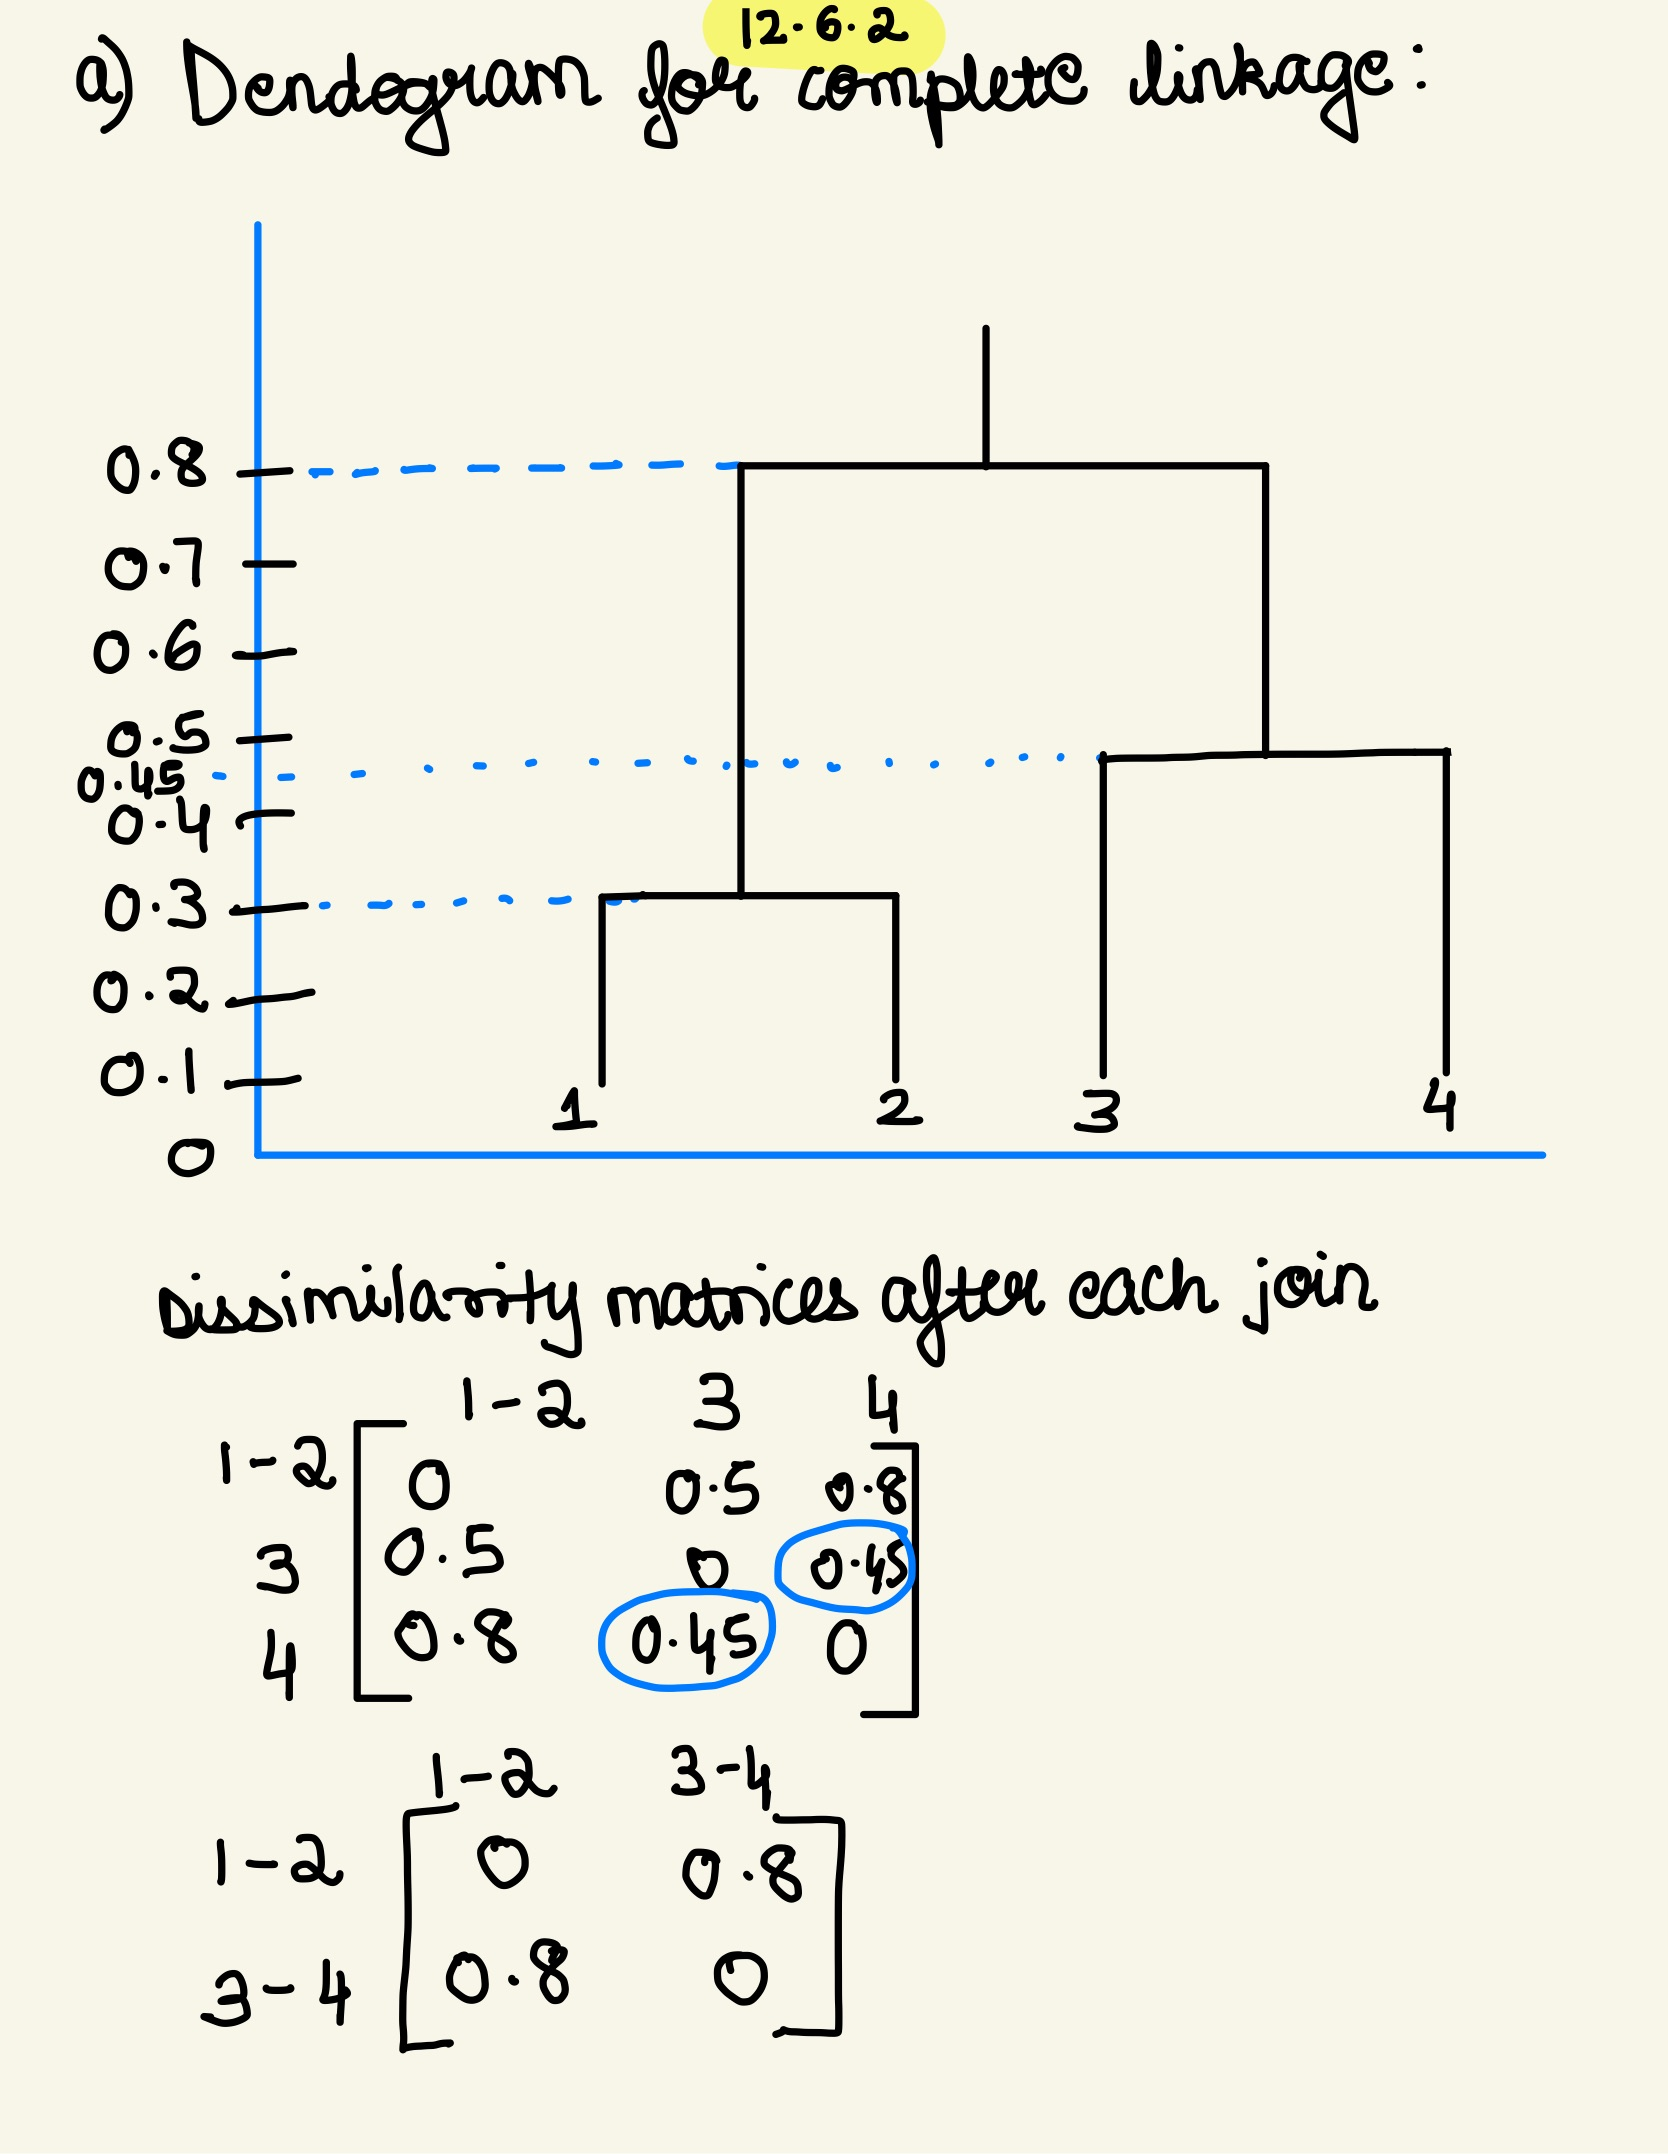

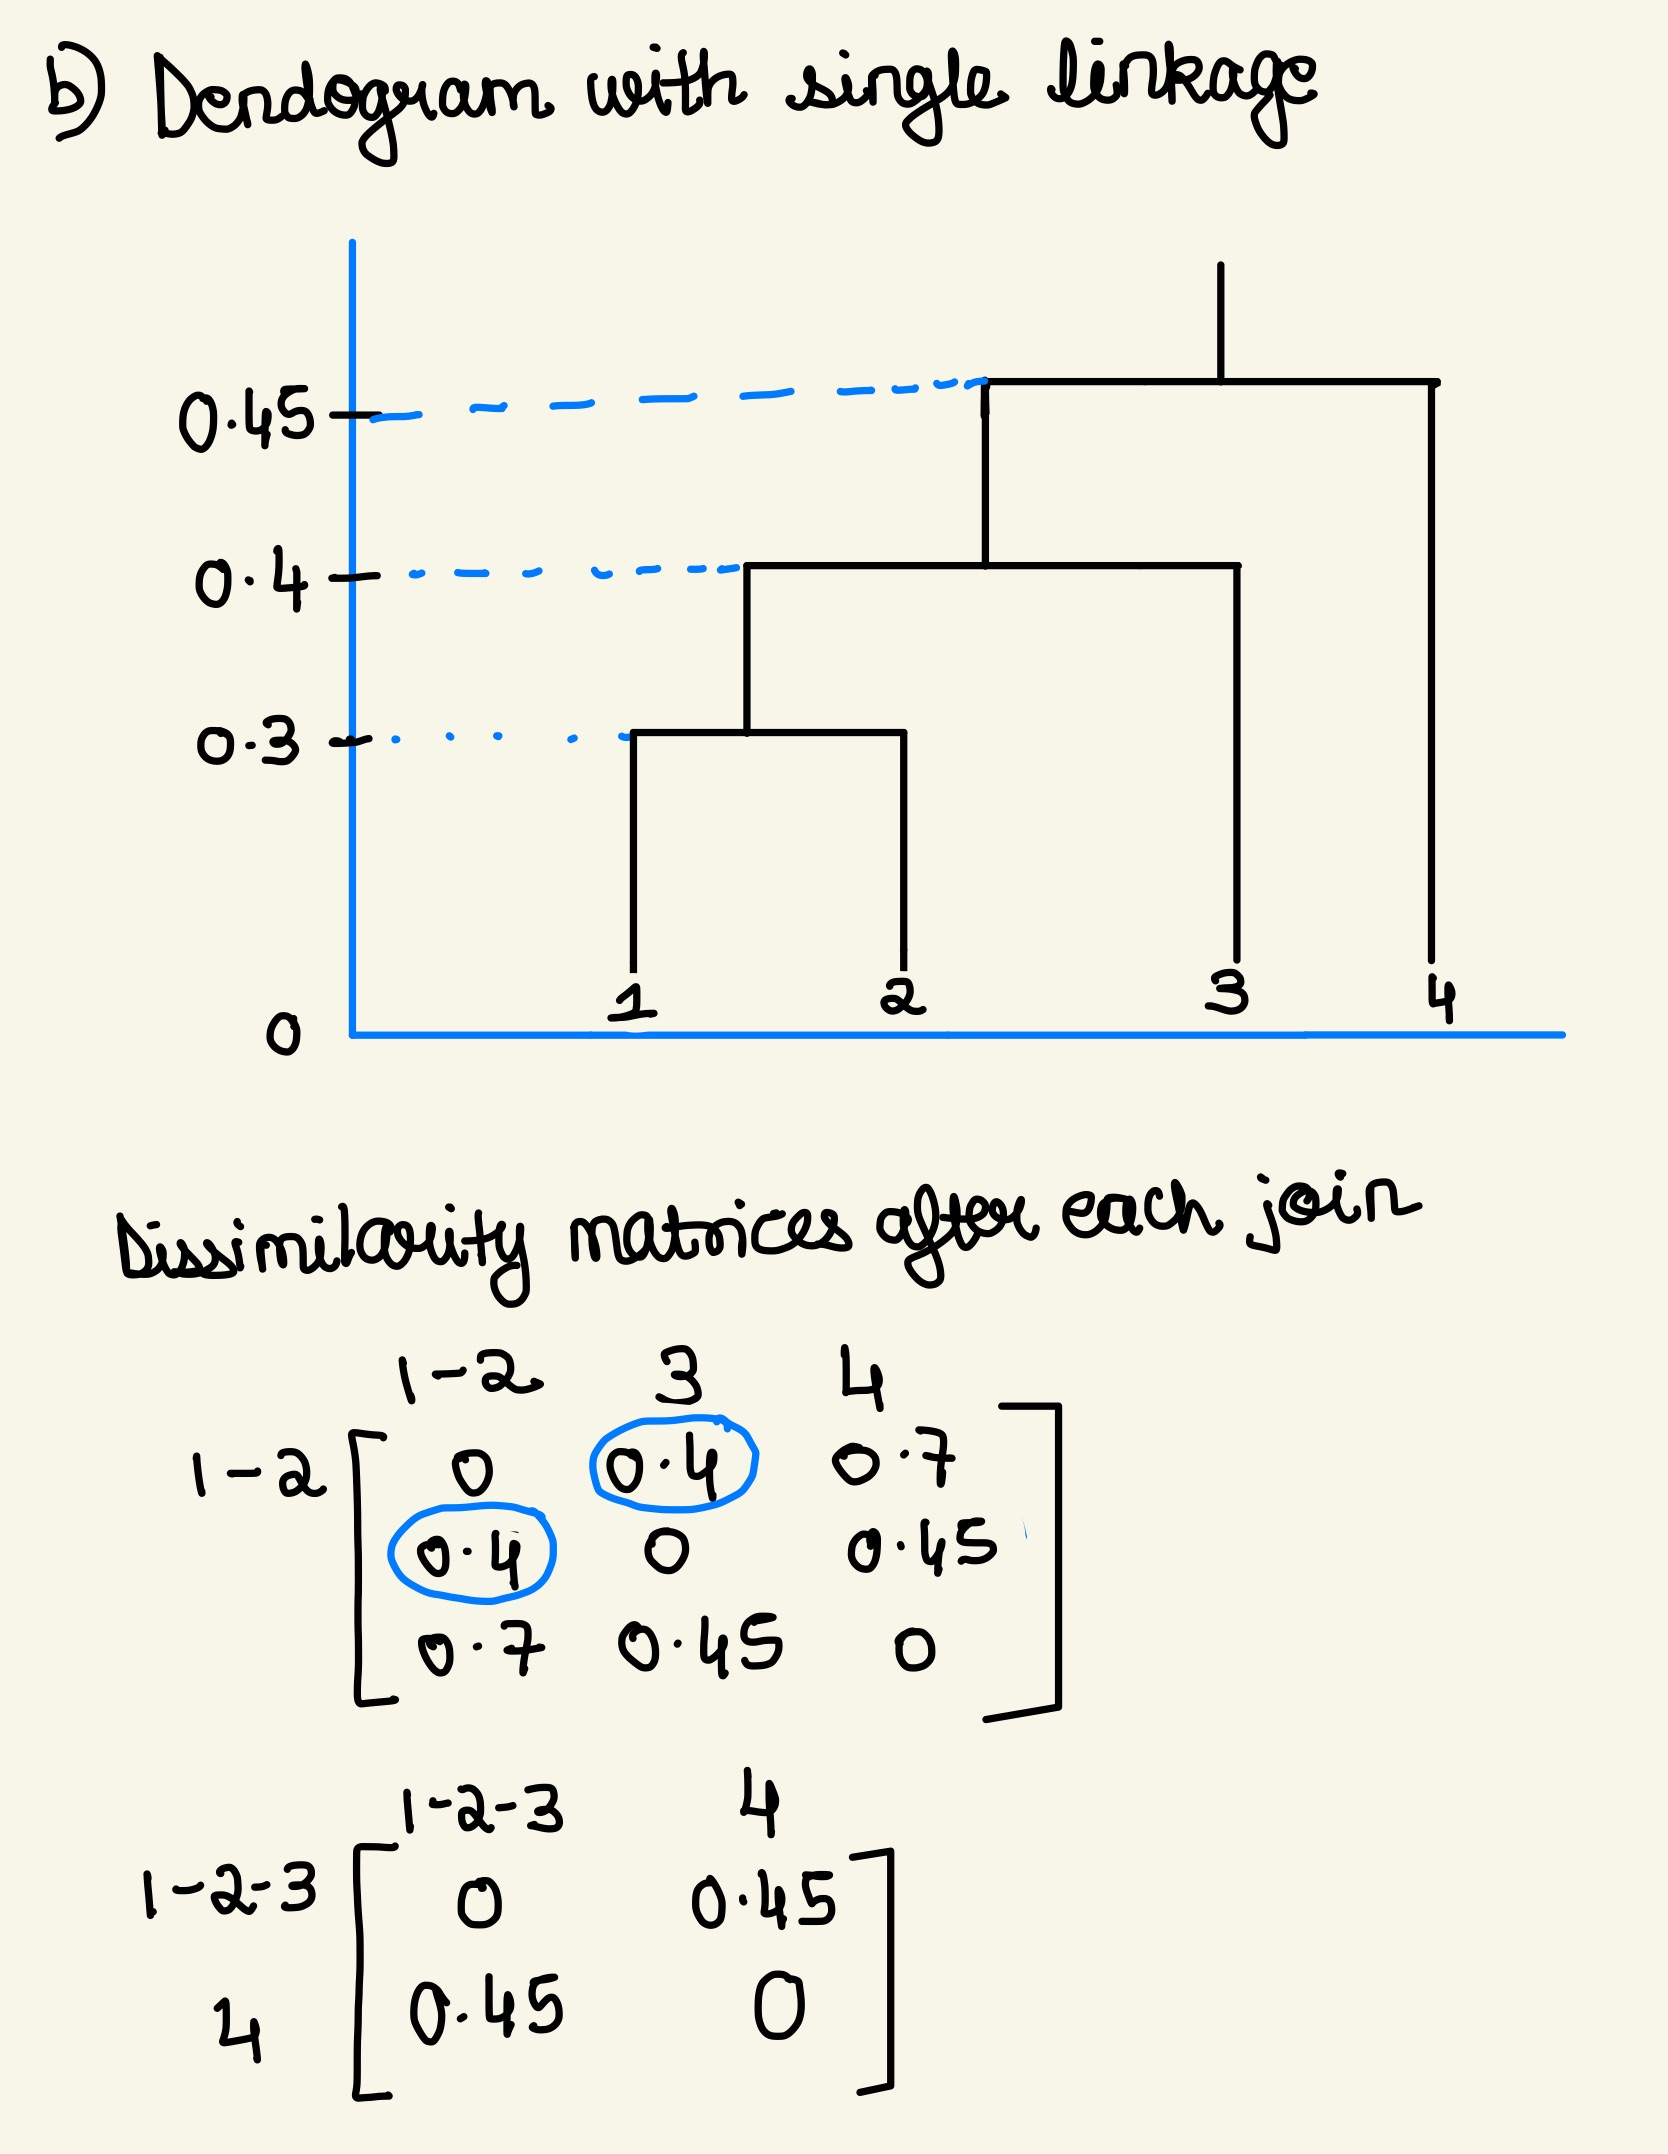

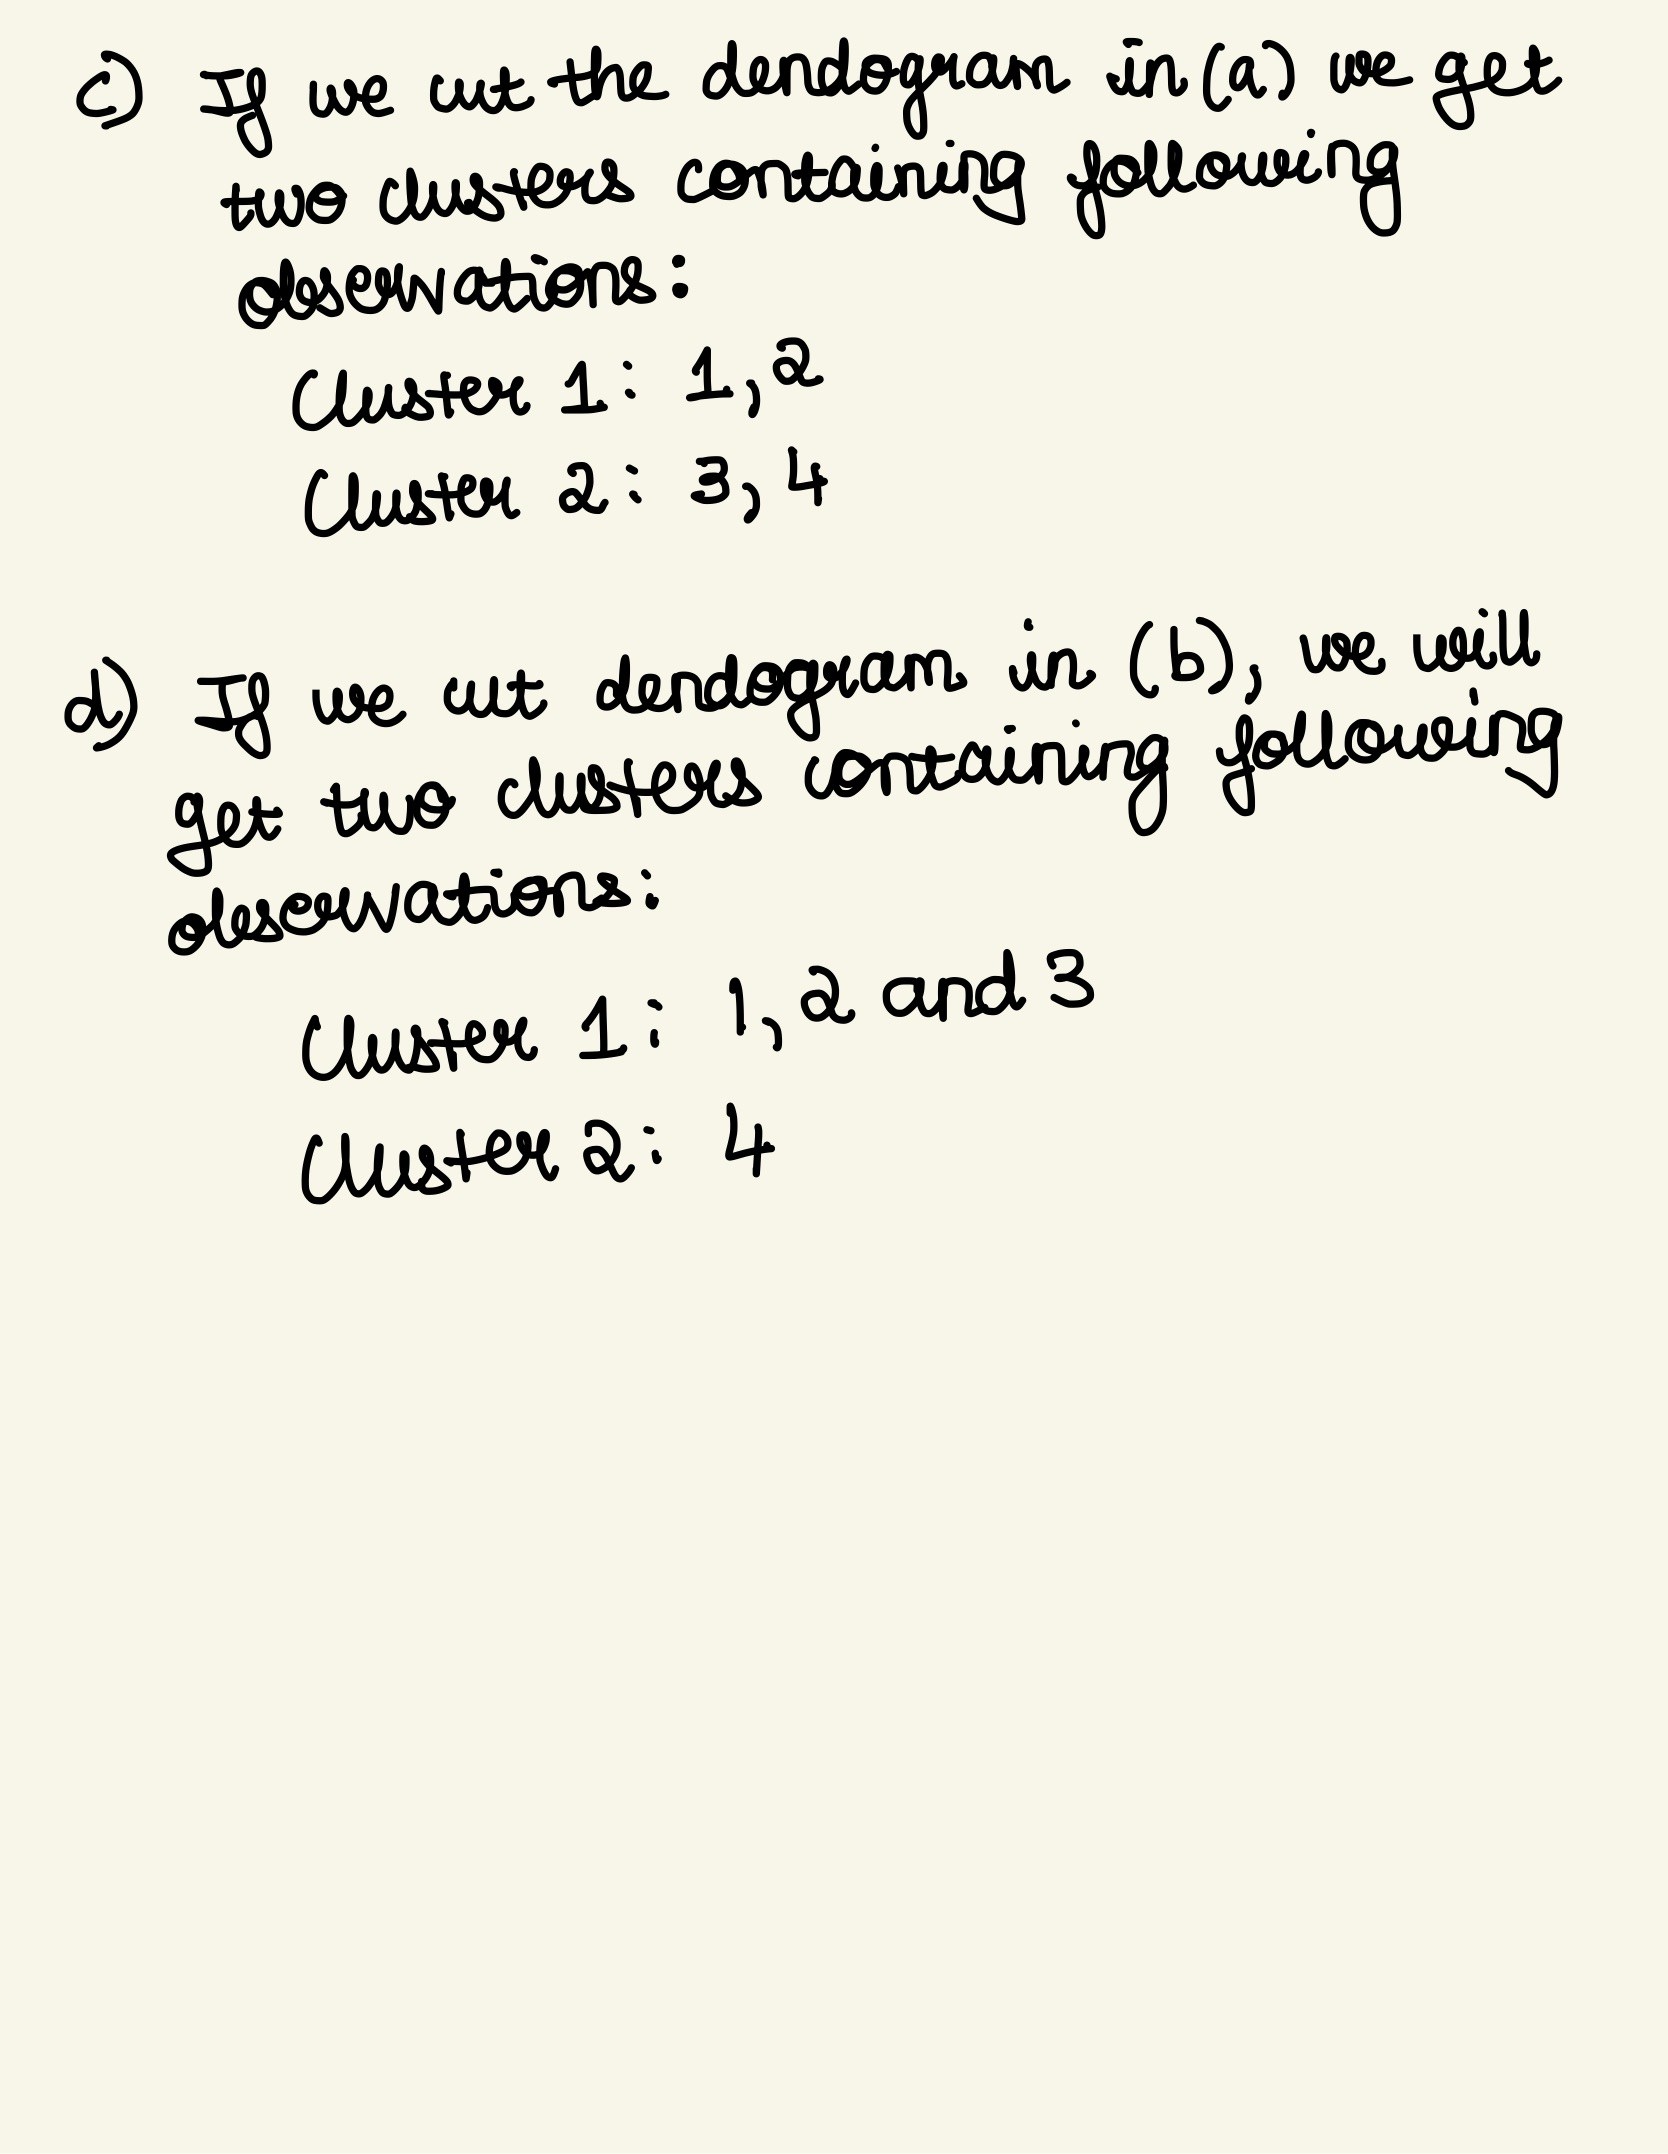

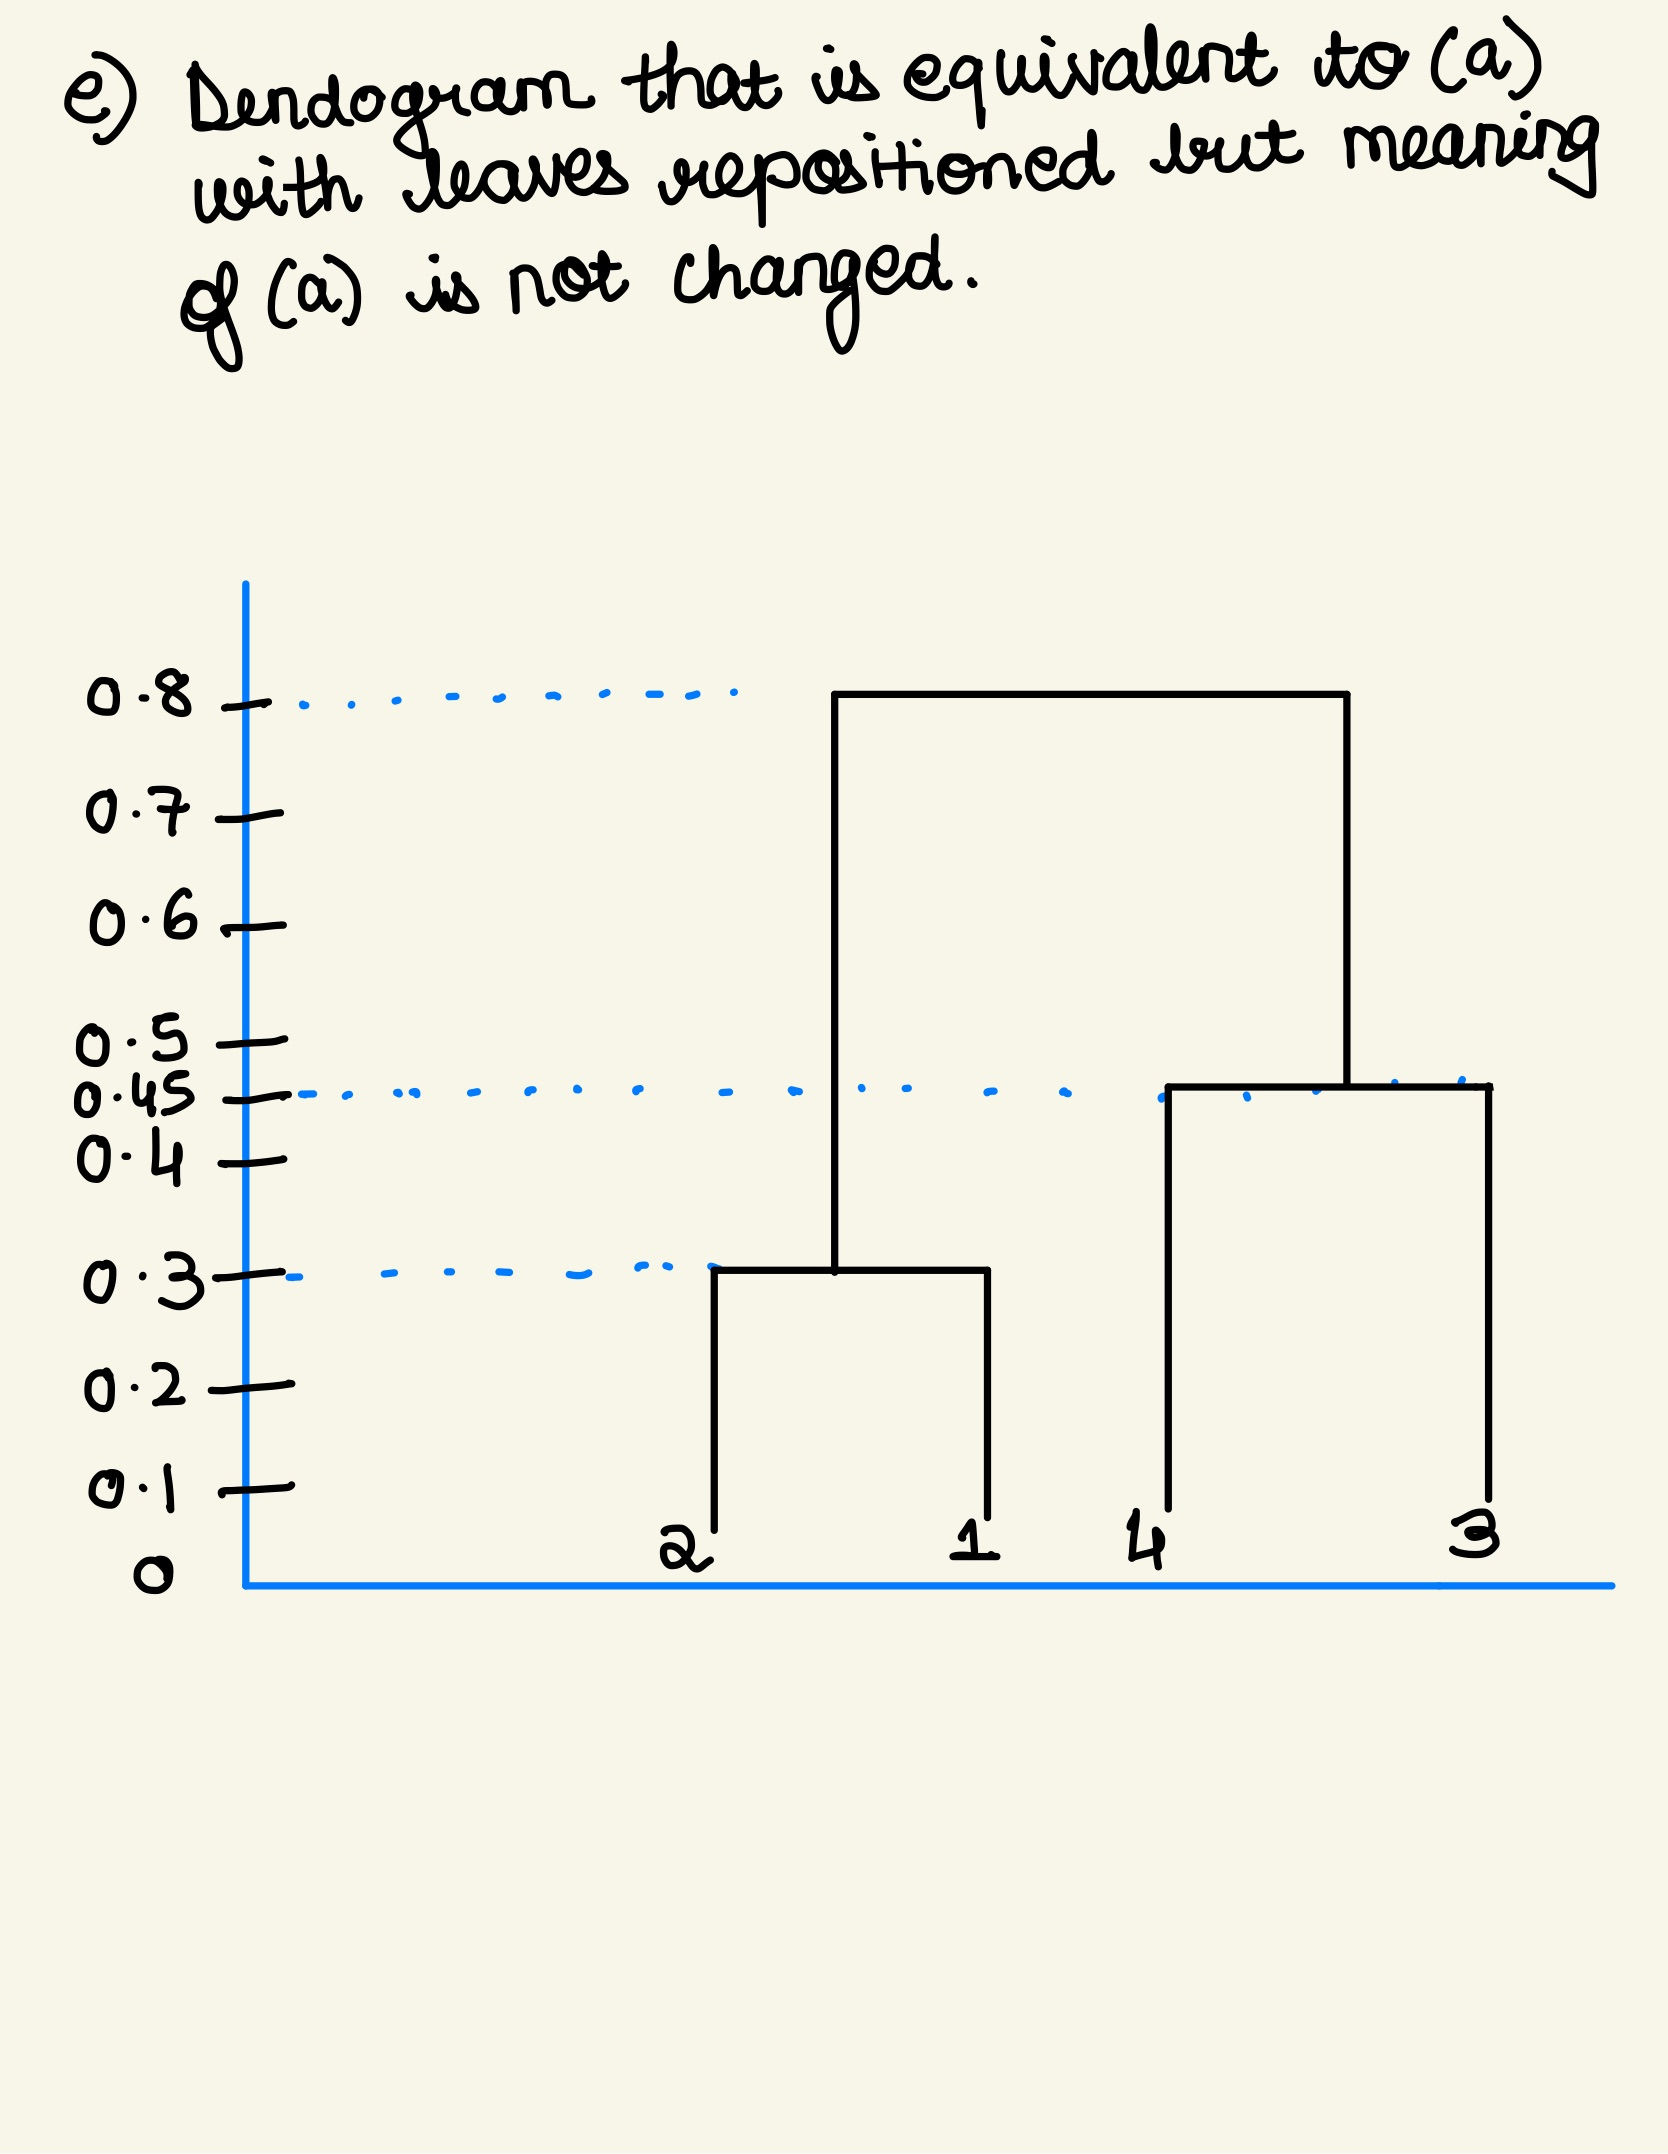

**References**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library

https://stackoverflow.com/questions/62235495/how-to-calculate-hamming-score-for-multilabel-classification

https://www.linkedin.com/pulse/hamming-score-multi-label-classification-chandra-sharat/

In [44]:
!pip freeze> requirements.txt